## Assignment 1 - Bayesian Analysis on a Grid
Christopher Monaghan

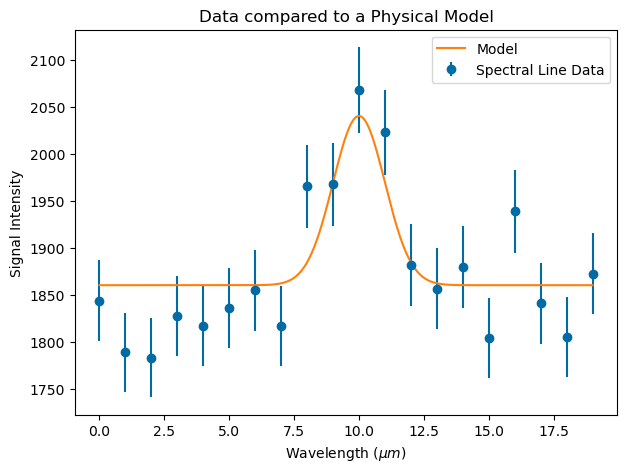

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

plt.style.use('tableau-colorblind10')

#We'll define a function for our Gaussian below, using the equation provided in the assignment 1 pdf
#p should take the form as a 2D array [A,B]
#0 <= A <= 1000, 0 <= B <=3000
def Gaussian(x: np.ndarray[float], p: np.ndarray[float], x0: float = 10.0, omega: float = 1.0) -> np.ndarray[float]: #the width (omega) and mean (x0) are known and set to default values
    A, B = p #extract the A and B values from the p argument
    return A * np.exp(-(x-x0)**2/(2*omega**2))+B #return 'y'


x_data, y_data = np.loadtxt('data.txt', unpack=True) #load in the values from data.txt


#Generate the model data using the values A = 180, B = 1860
x_model = np.linspace(min(x_data), max(x_data), 1000) #Well-sampled x axis with 1000 points
y_model = Gaussian(x_model, [180, 1860]) #Generate the gaussian using the model defined above

#Time to plot!
plt.figure(figsize = (7,5))
#plt.errorbar allows us to plot the spectral line data with the y error bars
plt.errorbar(x_data, y_data, yerr = np.sqrt(y_data), fmt = 'o', label='Spectral Line Data') 
plt.plot(x_model, y_model, label='Model')
plt.xlabel("Wavelength ($\mu m$)") #no actual units for either axis are given, so I'm assuming microns (infrared spectroscopy <3)
plt.ylabel("Signal Intensity") #unitless for now
plt.legend()
plt.title("Data compared to a Physical Model")
plt.show()
